In [53]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


import seaborn as sns

In [32]:
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [34]:
# Normalize features
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

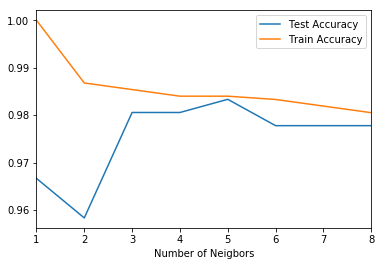

In [35]:
neighbors = []
train_accuracy = []
test_accuracy = []
for k in range(8):
    neighbors.append(k+1)
    classifier = KNeighborsClassifier(n_neighbors=k+1)
    classifier.fit(x_train, y_train)
    y_train_pred = classifier.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracy.append(train_acc)
    y_test_pred = classifier.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)
    
d = {'Number of Neigbors': neighbors, 'Test Accuracy': test_accuracy, 'Train Accuracy': train_accuracy}
df = pd.DataFrame(data=d)

ax = plt.gca()

df.plot(kind='line',x='Number of Neigbors',y='Test Accuracy', ax=ax)
df.plot(kind='line',x='Number of Neigbors',y='Train Accuracy', ax=ax)

plt.show()

Based off the above graph, it seems that 5 neighbors is best when applying knn to the MNIST dataset. This is the average value that is used during knn classification. 

In [58]:
# Calculate accuracy for KNN
classifier = KNeighborsClassifier(n_neighbors=5)
KNN_acc = accuracy_score(y_test, classifier.fit(x_train, y_train).predict(x_test))

In [47]:
# RBF Kernel
rbf = SVC(kernel='rbf', gamma='auto')
rbf.fit(x_train, y_train)

y_test_pred = rbf.predict(x_test)
print(classification_report(y_test, y_test_pred))

# Linear Kernel
linear = SVC(kernel='linear', gamma='auto')
linear.fit(x_train, y_train)

y_test_pred = linear.predict(x_test)
print(classification_report(y_test, y_test_pred))

# Sigmoid Kernel
sigmoid = SVC(kernel='sigmoid', gamma='auto')
sigmoid.fit(x_train, y_train)

y_test_pred = sigmoid.predict(x_test)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.99        33
           2       1.00      0.97      0.98        31
           3       1.00      0.97      0.99        38
           4       0.92      1.00      0.96        35
           5       0.98      1.00      0.99        42
           6       1.00      1.00      1.00        39
           7       1.00      0.95      0.98        42
           8       0.96      0.93      0.95        29
           9       0.97      0.97      0.97        29

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.94      0.97        33
           2       0.94      1.00      0.97        31
           3       1.00 

In this case, the best kernal to use would be the rbf kernal as it reports the highest precision, recall and f1-score.

In [60]:
# Calculate SVM accuracy
SVM_acc = accuracy_score(y_test, rbf.predict(x_test))

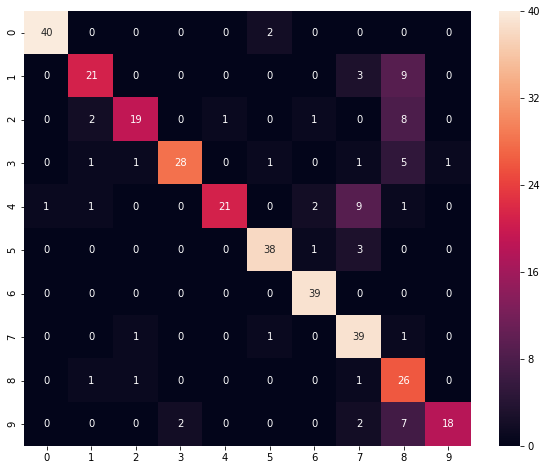

In [57]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True)
plt.show()

In [62]:
# Calculate Bayes Accuracy
Bayes_acc = accuracy_score(y_test, gnb.predict(x_test))

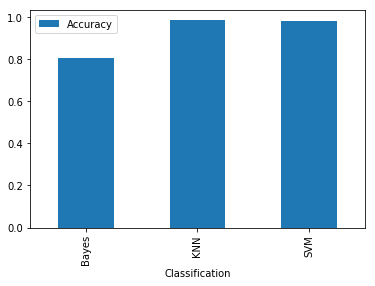

In [67]:
# Plot Accuracy
acc_df = pd.DataFrame({
    'Classification': ['Bayes', 'KNN', 'SVM'],
    'Accuracy': [Bayes_acc, KNN_acc, SVM_acc]
})

acc_df.plot(kind='bar', x='Classification', y='Accuracy')
plt.show()